# Predicting Bike Rentals using Decision Trees
In this project, we'll try to predict the total number of bikes people rented in a given hour. We will predict `cnt` column using all of the other columns, except for `casual` and `registered`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

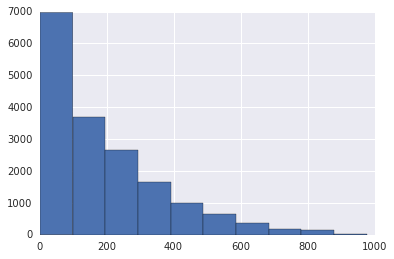

In [3]:
%matplotlib inline
plt.hist(bike_rentals["cnt"])

In [4]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

# Calculating Features

In [5]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

# Split - Test - Train
Before we apply machine learning algorithms, we need to split the data into training and testing sets. It will enable us to train an algorithm using the training set, and then evaluate its accuracy on the testing set. 

## Error Metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continious data, which fits our data quite well.

In [6]:
train = bike_rentals.sample(frac=.8)

In [7]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [8]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

16515.348981716368

The error is high, which may be due to the fact that the data has a few extremely high rentals counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to higher total error.

In [10]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [11]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

2272.458733647542

In [12]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

2467.1652761795167

# Decision Tree Error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

# Applying Random Forests
We will use `RandomForestRegressor` class to fit random forest algorithm to the `train` data. Then we will make predictions on `test` data, calculate the error between the predictions and the actual values.

In [13]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [14]:
predictions = reg.predict(test[predictors])
np.mean((predictions - test["cnt"]) ** 2)

1662.677938581622